In [31]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import shap

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)


### Prepare datase

In [40]:
test = pd.read_csv('test.csv', sep=';')
train = pd.read_csv('train.csv', sep=';')

In [41]:
X_test, y_test = test.drop(columns='vote_average'), test['vote_average']
X_train, y_train = train.drop(columns='vote_average'), train['vote_average']

# Modeling

In [42]:
features = set(X_train.columns).difference(['overview', 'id', 'overview_tokenized', 'vote_label'])

In [43]:
cb = CatBoostRegressor(verbose=0)

In [44]:
cb.fit(X_train[features], y_train)

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [60]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, cb.predict(X_test[features])))}')

RMSE: 1.6700499840228549


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [46]:
explainer = shap.Explainer(cb)
shap_values = explainer(X_test[features])

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


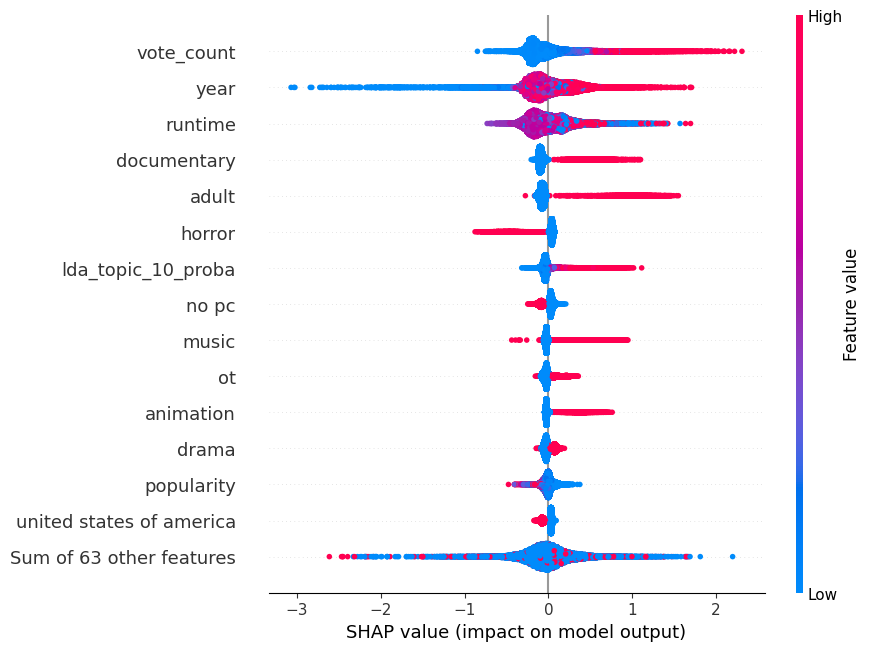

In [48]:
shap.plots.beeswarm(shap_values, max_display=15)


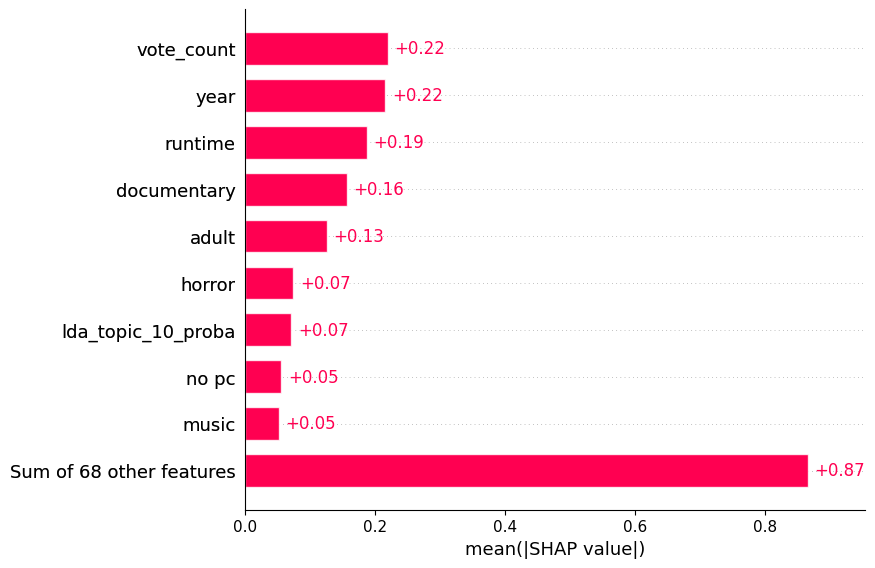

In [54]:
shap.plots.bar(shap_values)


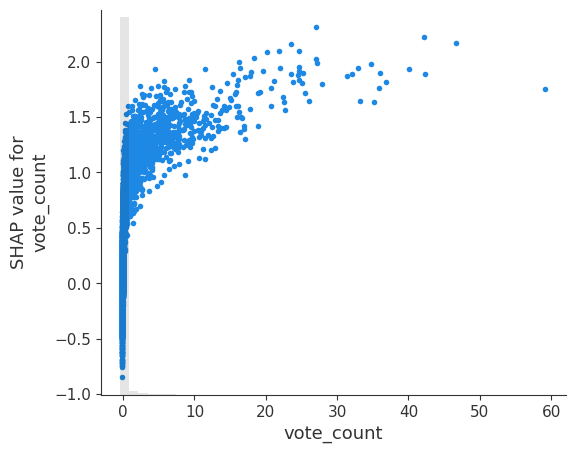

In [55]:
shap.plots.scatter(shap_values[:,"vote_count"])

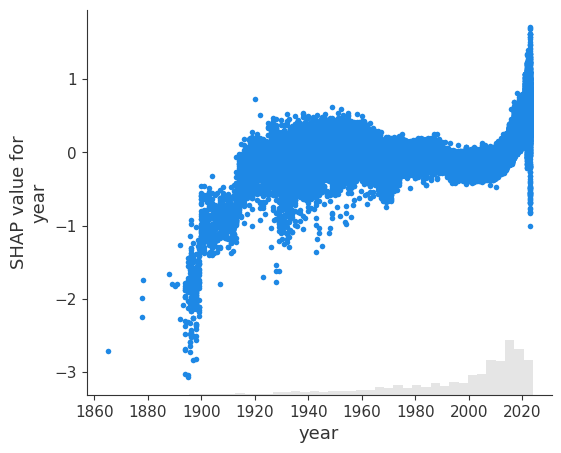

In [56]:
shap.plots.scatter(shap_values[:,"year"])

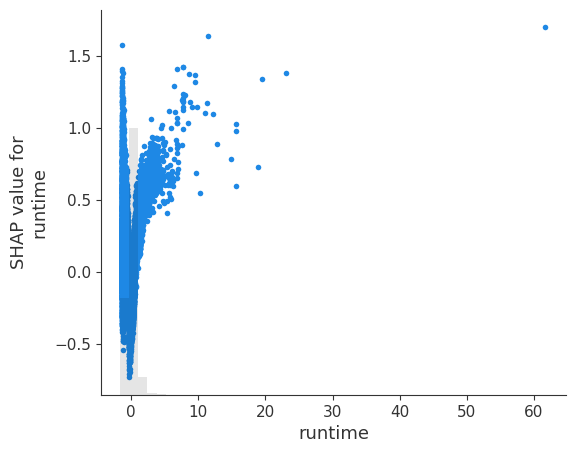

In [57]:
shap.plots.scatter(shap_values[:,"runtime"])

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train[features], y_train)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, rf.predict(X_test[features])))}')

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
explainer = shap.Explainer(rf)
shap_values = explainer(X_test[features])

In [ ]:
shap.plots.beeswarm(shap_values, max_display=15)


In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"vote_count"])